<a href="https://colab.research.google.com/github/Gaurab-B/MRS/blob/main/Content_Based_Recommendation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

#### Summer 2023
#### Dataset IMDB 5000 Movie Dataset

**Skip to text cell 72 to test different movie algorithms. The movieset is not that big so you might need to find some older movies to search and get the receommended movies.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [ ]:
path2 = "https://github.com/Gaurab-B/MRS/blob/main/movie_metadata.csv?raw=true"
movie_data = pd.read_csv(path2)

In [ ]:
# check the basic dataset format
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# check the column names
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# check the original dataset shape
movie_data.shape

(5043, 28)

In [ ]:
# check the dataset information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
# check the missing data in the dataset in terms of columns
movie_data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
# check the unique feature values of the color feature column
movie_data.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [ ]:
movie_data.director_name.unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'Scott Smith', 'Benjamin Roberds', 'Daniel Hsia'], dtype=object)

In [ ]:
len(movie_data.director_name.unique())

2399

## Data Cleaning

In this project, we consider partial feature columns of the original dataset to build the movie recommendation system

In [ ]:
movies = movie_data.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','plot_keywords']]

In [ ]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN


In [ ]:
# then we replace the missing values marked as NaN with new value, i.e., 'unknown'
movies['actor_1_name'] = movies['actor_1_name'].replace(np.nan, 'unknown')
movies['actor_2_name'] = movies['actor_2_name'].replace(np.nan, 'unknown')
movies['actor_3_name'] = movies['actor_3_name'].replace(np.nan, 'unknown')
movies['director_name'] = movies['director_name'].replace(np.nan, 'unknown')
movies['plot_keywords'] = movies['plot_keywords'].replace(np.nan, 'unknown')

In [ ]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown


In [ ]:
# drop duplicate values
movies.drop_duplicates(subset="movie_title", keep='last',inplace=True)

In [ ]:
# now check the shape again
movies.shape

(4917, 7)

In [ ]:
movies.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
plot_keywords    0
dtype: int64

In [ ]:
# Then we drop the missing values that cannot filled properly above
movies = movies.dropna()
movies = movies.reset_index(drop=True)
movies.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
plot_keywords    0
dtype: int64

In [ ]:
movies.loc[(movies.genres=='Drama')]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords
567,Oliver Stone,Frank Langella,Austin Pendleton,John Buffalo Mailer,Drama,Wall Street: Money Never Sleeps,corporate greed|crisis|economy|greed|mentor
628,Mike Newell,Julia Roberts,Kirsten Dunst,Marian Seldes,Drama,Mona Lisa Smile,art|college|school|student|wellesley college
642,David Fincher,Brad Pitt,Meat Loaf,Eugenie Bondurant,Drama,Fight Club,anti establishment|dark humor|fighting|multipl...
709,Steven Zaillian,Robert Duvall,Kathleen Quinlan,Sydney Pollack,Drama,A Civil Action,1980s|law firm|lawsuit|lawyer|toxic waste
1094,Gus Van Sant,F. Murray Abraham,Rob Brown,Michael Nouri,Drama,Finding Forrester,basketball|mentor|new york|school|writing
...,...,...,...,...,...,...,...
4877,Bradley Rust Gray,Zoe Kazan,Mark Rendall,Jordan Scovel,Drama,The Exploding Girl,friend|hospital|low budget film|ring|stoned
4892,Alex Kendrick,Shannen Fields,Lisa Arnold,Janet Lee Dapper,Drama,Flywheel,baby|car salesman|christian film|pregnancy|use...
4896,Jim Chuchu,Paul Ogola,Olwenya Maina,Mugambi Nthiga,Drama,Stories of Our Lives,unknown
4901,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,Drama,The Circle,abortion|bus|hospital|prison|prostitution


## Data Preprocessing

Since we are processing text data, so we need to perform basic preprocessing skills.
As we can observe from the above movies dataframe, there are
- mix of low-case, upcase, special characters (|) ...
- we need to combine them together as one text record for each movie in the data


So, we need to
- convert all upcases to lowercases
- keep only a-z, A-Z, 0-9 by removing other special characters


In [ ]:
# Build a function to apply the text cleaning techniques
import re
import string

def clean_text_func(text):
    '''Make text lowercase, removing special characters'''
    text = text.lower()
    # remove multiple whitespaces
    text = re.sub('\s+',' ', text)
    # remove characters that not words
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    return text

clean_text = lambda x: clean_text_func(x)

In [ ]:
# we apply the function on each column and store the result to a new column with original name_cleaned

cols = movies.columns
for col in cols:
    movies[col+'_cleaned'] = movies[col].apply(clean_text)

In [ ]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown,doug walker,doug walker,rob walker,unknown,documentary,star wars episode vii the force awakens,unknown


In [ ]:
movies.plot_keywords_cleaned[0]

'avatar future marine native paraplegic'

In [ ]:
movies.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title', 'plot_keywords', 'director_name_cleaned',
       'actor_1_name_cleaned', 'actor_2_name_cleaned', 'actor_3_name_cleaned',
       'genres_cleaned', 'movie_title_cleaned', 'plot_keywords_cleaned'],
      dtype='object')

put all the information in one dataframe column

In [ ]:
if 'all_data' not in movies.columns:                #this lines prevent from re-runing the data which causes multiple datasets.
    movies['all_data'] = movies[movies.columns[7:]].apply(
        lambda x: ' '.join(x.astype(str)),
        axis=1
        )
 #makes a new colmns called all data. 7: selects all the column names starting from the 7th column (index 7) and returns them as a list.
                      #The lambda function uses the join method to concatenate the values of the row (x) into a single string.
                                                   # The astype(str) part is used to convert each value to a string before joining them.
                                                         #apply method is used on selected axis where axis = 1 means on each row.
                                                         #. This lambda function takes a row (represented as x) as input.

In [ ]:
movies.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned,all_data
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic,james cameron cch pounder joel david moore wes...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...,gore verbinski johnny depp orlando bloom jack ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist,sam mendes christoph waltz rory kinnear stepha...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...,christopher nolan tom hardy christian bale jos...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown,doug walker,doug walker,rob walker,unknown,documentary,star wars episode vii the force awakens,unknown,doug walker doug walker rob walker unknown doc...


In [ ]:
movies.all_data[177]

'alfonso cuar n daniel radcliffe gary oldman rupert grint adventure family fantasy mystery harry potter and the prisoner of azkaban  magic muggle serial killer traitor wizard'

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

def world_cloud_generate(long_string):

    # create a worldcloud object
    wordcloud = WordCloud(background_color="white", max_words=50000,
                     contour_width=3, contour_color='steelblue', width=500,height=300,
                     repeat=False,include_numbers=False)
    # Generate a world cloud
    wordcloud.generate(long_string)

    return wordcloud

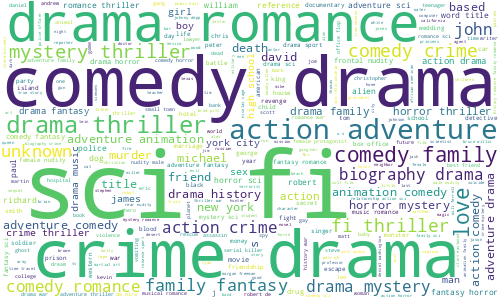

In [ ]:
# Visualize the title of all the recipes in the dataset
# Join the different processed title together
long_string_title = ','.join(list(movies.all_data.values))
wordcloud1 = world_cloud_generate(long_string_title)

# Visualize the worldcloud
wordcloud1.to_image()

## Prepare Text Data for the Machine Learning Model

To feed the text data to a machine learning model, we need to convert text data to numerical data. There are a few ways to do this in natural language processing fields, such as
- the bag-of-words model
- word counts based Tokenization method
- TF-IDF using TfidfVectorizer
- Hashing WORDS

In this demo file, the Tokenization method will be illustrated using the CountVectorizer procided by scikitlearn.


References:
1. Scikit-learn Working with Text Data https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
2. Encode text data https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [ ]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

def lemma_tokens(tokens, lemma):
    lemma_result = [lemma.lemmatize(item) for item in tokens]
    return(lemma_result)

def tokenize(text):
    lemma = nltk.WordNetLemmatizer()
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)

    # English Stop words
    # Re-add the additional stop words since we are recreating the document-term matrix
    stop_words = stopwords.words('english')

    # Remove all stop words: no_stops
    no_stops = [t for t in tokens if t not in stop_words]

    lemma = lemma_tokens(no_stops, lemma)
    filtered_result = [word for word in lemma if len(word) >= 3]
    return(filtered_result)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Re-add the additional stop words since we are recreating the document-term matrix
stop_words = stopwords.words('english')

# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

vect1 = CountVectorizer(stop_words= stop_words,
                       analyzer='word',
                       max_features = 5000,
                       tokenizer = tokenize,
                       lowercase = True)

# Fit and transform
nltk.download('punkt')              #this needs to be added or else the code wont run.
nltk.download('wordnet')
X = vect1.fit_transform(movies.all_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect2 = TfidfVectorizer(stop_words= stop_words,
                       analyzer='word',
                       max_features = 5000,
                       tokenizer = tokenize,
                       lowercase = True)

Y = vect2.fit_transform(movies.all_data)

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

vect3 = HashingVectorizer(stop_words= stop_words,
                       analyzer='word',
                       n_features=5000,       #uses n_features except of max_features.
                       tokenizer = tokenize,
                       lowercase = True,
)

Z = vect3.fit_transform(movies.all_data)

In [ ]:
# check the shape of matrix X
X.shape

(4917, 5000)

In [ ]:
Y.shape

(4917, 5000)

In [ ]:
Z.shape

(4917, 5000)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Z.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#X is tokenization or the token model
#Y is tf-idf model
#Z is hasing model

## Cosine Similarity using Tokenization


-- Try to fill and explore the following steps

In [ ]:
# measure the similarity between the query movie and all the movies in the dataset
# you may try using cosine similarity first
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(X)
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score

In [ ]:
import re                                                                           #THIS REMOVES ANY SUMBOLS

def extract_text(input_string):
    text_only = re.sub(r'[^a-zA-Z0-9\s]', '', input_string)
    return text_only.strip()

In [ ]:
def cosine_similarity_tokenization(query, K):
    cleaned_query = query[0].strip().lower()
    cleaned_query = extract_text(cleaned_query)
    unique_movie_titles = pd.Series(movies['all_data']).str.strip().unique()
    unique_movie_titless = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    if len(cleaned_query) < 3:
        return 'Error! The query must contain at least 3 characters.'
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)]
    if len(matching_titles) == 0:
        return 'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'
    else:
        matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
        query_vectors = X[matching_indices]

        similarity_scores = cosine_similarity(query_vectors, X)
        top_indices = similarity_scores.argsort()[0][::-1][1:K+1]   #//gives index of similiar ones, 0 is the first row that stores index
        recommended_movies = unique_movie_titless[top_indices]
        return list(recommended_movies)

In [ ]:
def cosine_similarity_tfidf(query, K):
    cleaned_query = query[0].strip().lower()
    cleaned_query = extract_text(cleaned_query)
    unique_movie_titles = pd.Series(movies['all_data']).str.strip().unique()
    unique_movie_titless = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    if len(cleaned_query) < 3:
        return 'Error! The query must contain at least 3 characters.'
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)]
    if len(matching_titles) == 0:
        return 'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'
    else:
        matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
        query_vectors = Y[matching_indices]
        similarity_scores = cosine_similarity(query_vectors, X)
        top_indices = similarity_scores.argsort()[0][::-1][1:K+1]   #//gives index of similiar ones, 0 is the first row that stores index
        recommended_movies = unique_movie_titless[top_indices]
        return list(recommended_movies)

In [ ]:
def cosine_similarity_hashing(query, K):
    cleaned_query = query[0].strip().lower()
    cleaned_query = extract_text(cleaned_query)
    unique_movie_titles = pd.Series(movies['all_data']).str.strip().unique()
    unique_movie_titless = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    if len(cleaned_query) < 3:
        return 'Error! The query must contain at least 3 characters.'
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)]
    if len(matching_titles) == 0:
        return 'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'
    else:
        matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
        query_vectors = Z[matching_indices]
        similarity_scores = cosine_similarity(query_vectors, Z)
        top_indices = similarity_scores.argsort()[0][::-1][1:K+1]   #//gives index of similiar ones, 0 is the first row that stores index
        recommended_movies = unique_movie_titless[top_indices]
        return list(recommended_movies)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

def jaccard_similarity_tokenization(query, K):
    cleaned_query = query[0].strip().lower()
    cleaned_query = extract_text(cleaned_query)
    unique_movie_titles = pd.Series(movies['all_data']).str.strip().unique()
    unique_movie_titless = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    if len(cleaned_query) < 3:
        return 'Error! The query must contain at least 3 characters.'
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)].tolist()
    if len(matching_titles) == 0:
        return 'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'
    else:
        matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
        query_vectors = X[matching_indices].toarray()  # Convert query vectors to dense array

        similarity_scores = pairwise_distances(query_vectors, X.toarray(), metric='jaccard')
        similarity_scores = 1 - similarity_scores  # Convert to similarity scores

        top_indices = similarity_scores.argsort()[:, ::-1][:, 1:K+1]
        recommended_movies = unique_movie_titless[top_indices]
        return recommended_movies.tolist()[0]


In [ ]:
def jaccard_similarity_tfidf(query, K):
    cleaned_query = query[0].strip().lower()
    cleaned_query = extract_text(cleaned_query)
    unique_movie_titles = pd.Series(movies['all_data']).str.strip().unique()
    unique_movie_titless = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    if len(cleaned_query) < 3:
        return 'Error! The query must contain at least 3 characters.'
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)].tolist()
    if len(matching_titles) == 0:
        return 'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'
    else:
        matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
        query_vectors = Y[matching_indices].toarray()

        similarity_scores = pairwise_distances(query_vectors, Y.toarray(), metric='jaccard')
        similarity_scores = 1 - similarity_scores   #Jaccard Distance to Jaccard Similarity

        top_indices = similarity_scores.argsort()[:, ::-1][:, 1:K+1]
        recommended_movies = unique_movie_titless[top_indices]
        return recommended_movies.tolist()[0]

In [ ]:
def jaccard_similarity_hasihing(query, K):
    cleaned_query = query[0].strip().lower()
    cleaned_query = extract_text(cleaned_query)
    unique_movie_titles = pd.Series(movies['all_data']).str.strip().unique()
    unique_movie_titless = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    if len(cleaned_query) < 3:
        return 'Error! The query must contain at least 3 characters.'
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)].tolist()
    if len(matching_titles) == 0:
        return 'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'
    else:
        matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
        query_vectors = Z[matching_indices].toarray()

        similarity_scores = pairwise_distances(query_vectors, Z.toarray(), metric='jaccard')
        similarity_scores = 1 - similarity_scores   #Jaccard Distance to Jaccard Similarity

        top_indices = similarity_scores.argsort()[:, ::-1][:, 1:K+1]
        recommended_movies = unique_movie_titless[top_indices]
        return recommended_movies.tolist()[0]

**Use Different Movies in the line 72 and run all the models below:**

In [ ]:
K = 10

In [ ]:
inputt = input("Enter your query: ")
query =[inputt]

Enter your query: Avengers


In [ ]:
cosine_similarity_tokenization(query, K)                                        #Cosine Similarity using Tokenization

['captain america  civil war',
 'the avengers',
 'captain america  the first avenger',
 'captain america  the winter soldier',
 'thor',
 'spawn',
 'the incredible hulk',
 'iron man 2',
 'superman ii',
 'batman v superman  dawn of justice']

In [ ]:
cosine_similarity_tfidf(query,K)                                              #Cosine Similarity using TFIDF

['captain america  civil war',
 'the avengers',
 'captain america  the first avenger',
 'thor',
 'captain america  the winter soldier',
 'spawn',
 'the incredible hulk',
 'constantine',
 'iron man 2',
 'serenity']

In [ ]:
cosine_similarity_hashing(query, 10)                                        #Cosine Similarity using Hashing

['captain america  civil war',
 'the avengers',
 'captain america  the first avenger',
 'captain america  the winter soldier',
 'thor',
 'spawn',
 'iron man 2',
 'superman ii',
 'the incredible hulk',
 'batman v superman  dawn of justice']

In [ ]:
jaccard_similarity_tokenization(query, K)                           #Jaccard Similarity using Tokenization

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


['captain america  civil war',
 'the avengers',
 'captain america  the winter soldier',
 'iron man 2',
 'thor',
 'batman v superman  dawn of justice',
 'captain america  the first avenger',
 'superman ii',
 'the incredible hulk',
 'deadpool']

In [ ]:
jaccard_similarity_tfidf(query,K)                                 #Jaccard Similarity using TfIdf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


['captain america  civil war',
 'the avengers',
 'captain america  the winter soldier',
 'iron man 2',
 'thor',
 'batman v superman  dawn of justice',
 'captain america  the first avenger',
 'superman ii',
 'the incredible hulk',
 'deadpool']

In [ ]:
jaccard_similarity_hasihing(query, K)                       #Jaccard Similarity using Hashing

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


['captain america  civil war',
 'the avengers',
 'captain america  the winter soldier',
 'iron man 2',
 'thor',
 'captain america  the first avenger',
 'batman v superman  dawn of justice',
 'superman ii',
 'teenage mutant ninja turtles  out of the shadows',
 'the incredible hulk']

There are a total of 6 differnent models:

Jaccard and Cosine Similarity combined with tokenization,tf-idf and Hashing NLP methods.